## 앙상블 모델과 단일 모델 성능 비교 <hr>

-   데이터 : sklearn.database의 breast_cancer
-   유형 : 지도학습 + 분류
-   방법 : LogisticRegression, DecisionTree, RandomForest


[1] 모듈 로딩 및 데이터 준비


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)


In [3]:
X.shape, y.shape


((569, 30), (569,))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)


[2] 학습 진행 <hr>


[2-1] 선형회귀 LogisticRegression


In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

[2-2] DecisionTree 알고리즘 기반 분류


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

[2-3] Ensemble 알고리즘 기반 분류


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=5)

-   3개 알고리즘 모델에 대한 성능 평가


In [8]:
print(
    f"[LogisticRegression] Train : {lr_model.score(X_train, y_train)}, Test : {lr_model.score(X_test, y_test)}"
)
print(
    f"[DecisionTreeClassifier] Train : {dt_model.score(X_train, y_train)}, Test : {dt_model.score(X_test, y_test)}"
)
print(
    f"[RandomForestClassifier] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}"
)


[LogisticRegression] Train : 0.9582417582417583, Test : 0.9649122807017544
[DecisionTreeClassifier] Train : 1.0, Test : 0.9210526315789473
[RandomForestClassifier] Train : 1.0, Test : 0.9649122807017544


In [15]:
featuresDF = pd.DataFrame([rf_model.feature_names_in_, rf_model.feature_importances_])
featuresDF = featuresDF.T
featuresDF.set_index(0, inplace=True)


In [20]:
featuresDF.sort_values(by=1, ascending=False, inplace=True)


<Axes: ylabel='0'>

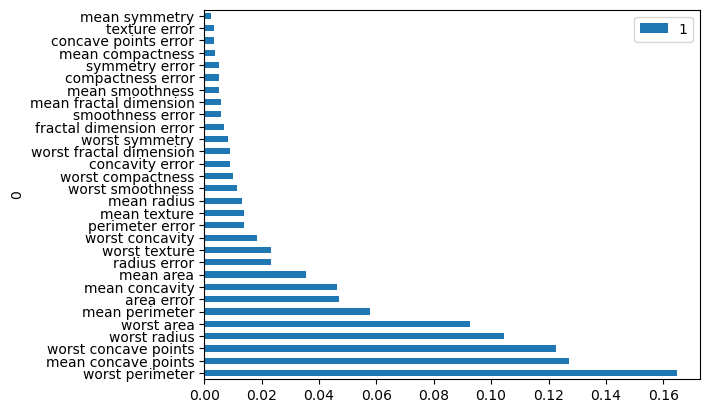

In [21]:
featuresDF.plot(kind="barh")
